In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1. / (1. + numpy.exp(-x))

def loss_function(Y, T): # cross-entropy loss
    tmp = - T.dot(numpy.log(Y).T) - (1 - T).dot(numpy.log(1 - Y).T)
    return float(tmp)
                                                   
def forward(X, W1, W2):
    H = sigmoid(W1.dot(X))
    H[0,:] = 1. # bias
    return sigmoid(W2.dot(H)), H

def accuracy(X, T, W1, W2):
    Y, _ = forward(X.T, W1, W2)
    P = Y > 0.5 # threshold binary classes
    return numpy.sum(P == T) / len(T)

def gradient_layer_1(X, W, H, Y, T):
    tmp = W.T.dot(Y - T) * H * (1. - H)
    return tmp.dot(X.T)

def gradient_layer_2(H, Y, T):
    return (Y-T).dot(H.T)

def descent(X, T, W1, W2, eta):
    Y, H = forward(X, W1, W2)
    loss = loss_function(Y, T)
    W1 -= eta * gradient_layer_1(X, W2, H, Y, T)
    W2 -= eta * gradient_layer_2(H, Y, T)
    return W1, W2, loss 
                           
def gradient_descent(X, T, W1, W2, eta, epochs):
    loss_arr = []
    acc_arr = []
    for epoch in range(epochs):
        W1, W2, J = descent(X.T, T.T, numpy.copy(W1), numpy.copy(W2), eta)
        loss_arr.append(J)
        acc_arr.append(accuracy(X, T, W1, W2))
    return W1, W2, loss_arr, acc_arr

def load_data(filename):
    X, T = [],[]
    
    # read dataset
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            arr = numpy.array(line.split(',')).astype(numpy.float)
            X.append(arr[:-1]) # add all elements without last one
            T.append(arr[-1]) # last element is the target value
    f.close()

    X = numpy.hstack((numpy.ones((len(X),1)), numpy.array(X))) # add bias term
    X /= numpy.max(X, axis=0) # normalize data
    T = numpy.array(T)
    return X, T

def plot_data(loss_arr, acc_arr):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
    ax1.semilogy(loss_arr, label='loss')
    ax2.semilogy(acc_arr, label='accuracy', color='red')
    fig.legend()

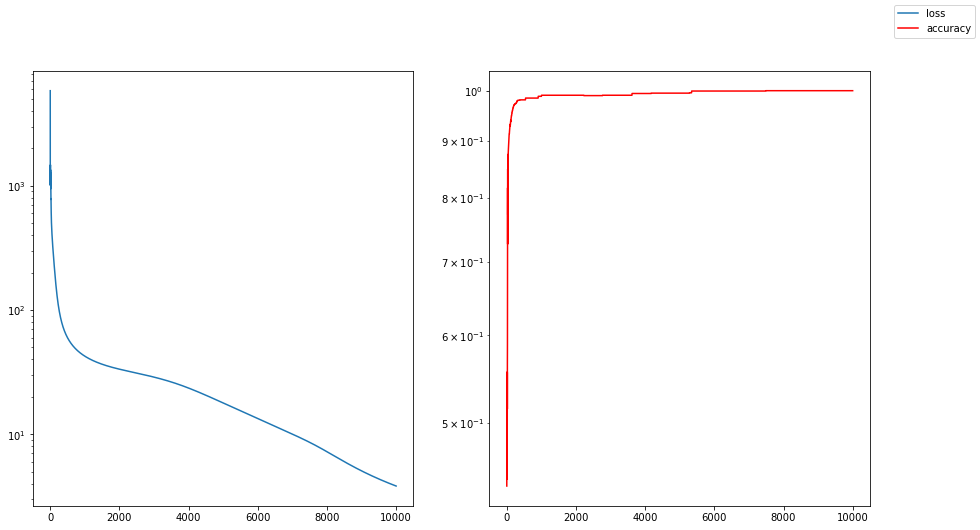

In [3]:
# Froged Bank Notes Dataset

X, T = load_data('data/data_banknote_authentication.txt')

# hyperparameters
eta = 0.001
epochs = 10000
k = 20

## init weights
W1 = numpy.random.uniform(size=(k+1,X.shape[1])) # first layer weights
W2 = numpy.random.uniform(size=(1,k+1)) # second layer weights

## run gradient descent
W1, W2, loss_arr, acc_arr = gradient_descent(X, T, W1.copy(), W2.copy(), eta, epochs)
  
## plot loss & accuracy
plot_data(loss_arr, acc_arr)

In [4]:
'Accuracy: ' + f'{acc_arr[-1]:3.4}'

'Accuracy: 1.0'

In [5]:
'Loss: ' + f'{loss_arr[-1]:3.4}'

'Loss: 3.827'

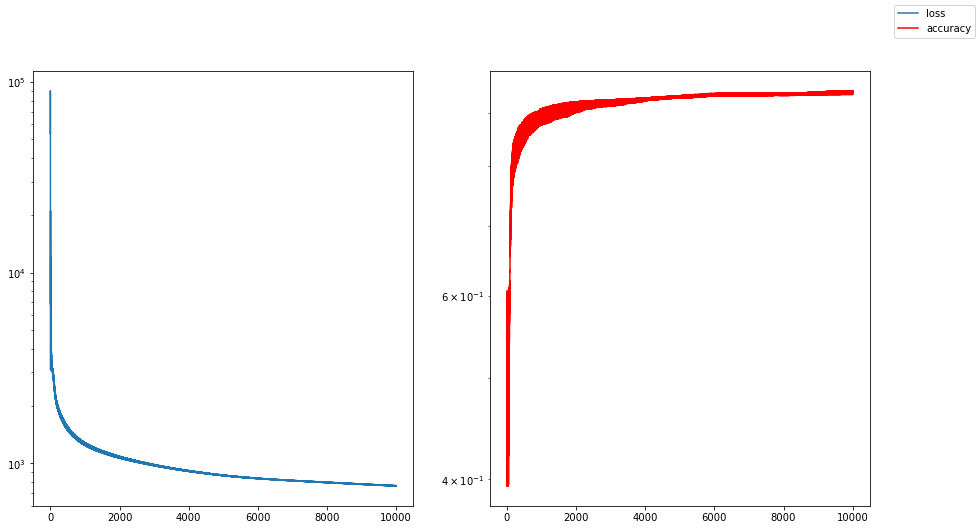

In [6]:
# Spam Email Dataset

X, T = load_data('data/spambase.data')

# hyperparameters
eta = 0.001
epochs = 10000
k = 50

# init weights
W1 = numpy.random.uniform(size=(k+1,X.shape[1])) # first layer weights
W2 = numpy.random.uniform(size=(1,k+1)) # second layer weights

# run gradient descent
W1, W2, loss_arr, acc_arr = gradient_descent(X, T, W1.copy(), W2.copy(), eta, epochs)
  
# plot loss & accuracy
plot_data(loss_arr, acc_arr)

In [7]:
'Accuracy: ' + f'{acc_arr[-1]:3.4}'

'Accuracy: 0.9446'

In [8]:
'Loss: ' + f'{loss_arr[-1]:3.4}'

'Loss: 763.8'